# Tehtävä: Opiskelijaryhmän tiedot

Students:

Adham Naderi - AB8911

Onni Roivas - AB0410

# Tehtäväkokonaisuus 6: Datan esikäsittely ja koneoppiminen - tulosanalyysi

## Koneoppimisen tulosten analysointi - tehtävät

* Tehtävä 6.1: Datan esikäsittely
* Tehtävä 6.2: Koneoppiminen kolmella eri menetelmällä
* Tehtävä 6.3: Tulosten analysointi ja menetelmien vertailu

# 6.1 Datan esikäsittely

* Kuvaile mitä tässä osiossa tapahtuu?
* Miksi dataa yleisesti ottaen esikäsitellään?
* Millainen on DataFrame, jota tehtävän seuraavien vaiheiden koneoppimisen algoritmit käyttävät
* Mitä muutalle datalle voisi vielä tarvittaessa tehdä ennen koneoppimisvaihetta?

# 6.1 Vastaukset

### Miksi dataa yleisesti ottaen esikäsitellään?

Esikäsittely on tärkeää sillä sen avulla pääsee katsomaan seuraavat asiat:

1. Onko datassa puuttuvia arvoja jotka aiheuttavat koneoppimisalgoritmeille ongelmia. Puuttuvia arvoja täydennetään käyttämällä median, mean, mode ja varmasti muita älykkäämpiä tapoja.
2. Esityykö datassa mitään poikkeavuuksia
3. Datan muokkaaminen/puhdistaminen tehtävän tarpeiden mukaiseksi
4. Skaalaaminen


### Mitä muuta datalle voisi vielä tarvittaessa tehdä ennen koneoppimisvaihetta?

1. Poikkeauvuuksien ja virheellisten arvojen tarkistaminen, korjaaminen, poistaminen.
2. Datan puhdistaminen ja järjesteleminen
3. Valita etukäteen mitä tiettyjä asioita dataan sijoittaa sillä tietyt sarakkeet voisivat olla tarpeettomia tai ne voivat mahdollisesti sisältää tietoa mitä ei tarvita tai todella vähän informatiivista tietoa.
4. Muuttujien yhden-koodaus(One-Hot Encoding) sillä on todella paljon koneoppimisalgoritmeja jotka normalisoivat arvoja 0 ja 1 välillä.


### Kuvaile mitä tässä osiossa tapahtuu?

Ensimmäisenä data luetaan käyttäen "pd.read_csv('titanic.csv')"

Tämän jälkeen poistetaan tarpeettomat sarakkeet käyttäen "df.drop". Sarakkeet jotka poistetaan ovat seuraavat:
    - PassengerId
    - Name
    - Ticket
    - Cabin
   
Puuttuvat arvot käsitellään käytteän mode funktiota joka katsoo mikä lukema on yleisin/eniten esiintyvä ja se täyttää puuttuvat arvot sillä kuten tässä tapauksessa "S" toistui eniten niin se täytti "NaN(Not a Number)" arvot sillä. Jos mode funktiossa esiinty useampi arvo niin voidaan käyttää niinkun meidän tapauksessa "loc[0]" joka ottaa ensimmäisen mode arvon.

Tässä tapauksessa arvot mitä alunperin "Embarked" sarakkeessa ilmeni olivat seuraavat

    - ["S", NaN, "C", "S", NaN]
    - Mode funktion jälkeen:
    - ["S", "S", "C", "S", "S"]
    
    
Tämän jälkeen käytetään scikit-learnin LabelEncoderia jolla muutetaan sarakkeiden "Embarked" ja "Sex" arvot numeerisiksi. 


Lopuksi luodaan kaksi uutta saraketta jotka ovat seuraavat:

    - df["FamilySize"] = df["SibSp"] + df["Parch"]
    - df["IsAlone"] = 1
    - df.loc[df["FamilySize"] > 0, "IsAlone"] = 0


Näiden avulla katsotaan onko henkilö yksin vai matkusteleeko perheen kanssa.

### Millainen on DataFrame, jota tehtävän seuraavien vaiheiden koneoppimisen algoritmit käyttävät

1. Survived

2. Pclass

3. Sex

4. Age

5. SibSp

6. Parch

7. Fare

8. Embarked

9. FamilySize = ilmaisee matkustajan perheen koon laskemalla SibSp- ja Parch-sarakkeiden summan.

10. IsAlone = ilmaisee, matkustiko matkustaja yksin (arvo 1) vai ei (arvo 0)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
print("Puuttuvien arvojen lukumäärä per muuttuja:\n%s" % df.isnull().sum())

median_age = df["Age"].median()
df["Age"] = df["Age"].fillna(median_age)
most_frequent_embarked = df["Embarked"].mode().loc[0]
df["Embarked"] = df["Embarked"].fillna(most_frequent_embarked)

sex_le, embarked_le = LabelEncoder(), LabelEncoder()
df["Sex"] = sex_le.fit_transform(df["Sex"])
df["Embarked"] = embarked_le.fit_transform(df["Embarked"])

print(dict(zip(sex_le.classes_, sex_le.transform(sex_le.classes_))))
print(dict(zip(embarked_le.classes_, embarked_le.transform(embarked_le.classes_))))

df["FamilySize"] = df["SibSp"] + df["Parch"]
df["IsAlone"] = 1
df.loc[df["FamilySize"] > 0, "IsAlone"] = 0

y = df["Survived"]
x = df.drop("Survived", axis=1)
x.head()

Puuttuvien arvojen lukumäärä per muuttuja:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
{'female': 0, 'male': 1}
{'C': 0, 'Q': 1, 'S': 2}


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,1,22.0,1,0,7.2500,2,1,0
1,1,0,38.0,1,0,71.2833,0,1,0
2,3,0,26.0,0,0,7.9250,2,0,1
3,1,0,35.0,1,0,53.1000,2,1,0
4,3,1,35.0,0,0,8.0500,2,0,1


# Tehtävä 6.2 

# Koneoppiminen ensimmäisellä menetelmällä

Kysymyksiä pohdittavaksi?

- Millaisesta menetelmästä on kysymys?
- Miten koneoppiminen tällä menetelmä onnistui?
- Muita huomioita?

# Koneoppiminen ensimmäisellä menetelmällä - Vastaukset

### Millaisesta menetelmästä on kysymys?

Tässä tehtävässä on käytetty K-Nearest Neighbors (KNN) menetelmää joka käyttää läheisyyttä luokittelujen sekä ennusteiden tekemiseen. Sitä käytetään tyypillisesti luokittelualgoritmina, joka olettaa että samankaltaisia pisteitä löytyy läheltä toisiaan.

### Miten koneoppiminen tällä menetelmä onnistui?

Se on suorittautunut hyvin sillä virhematriisi on saavuttanut 70.15% ~ tarkkuuden joka tarkoittaa tässä tapauksessa sitä, että datasta 70.15% on luokiteltu oikein.

### Muita huomioita?

Virhematriisin tuottama tarkkuus on täysin riippuvainen datan sisällöstä ja laadusta. Tämän lisäksi matriisi on 2x2 joka näyttää kahta eri lohkoa jotka ovat negatiivinen ja positiivinen. (True Positive ja True Negative)

![Tehtävä 6.2 Confusion Matriisi sekä Plot](6.2.JPG)

# Koneoppiminen ensimmäisellä menetelmällä - Vastaukset

- Millaisesta menetelmästä on kysymys?
- Miten koneoppiminen tällä menetelmä onnistui?
- Muita huomioita?

### Millaisesta menetelmästä on kysymys?

Ensimmäinen kuvaaja sekä toinen kuvaaja ovat enemmänkin visualisointia eivätkä sisällä mitään koneoppimisenmenetelmiä mutta viimeinen käyttää K-Means menetelmää joka on ohjaamaton koneoppimisenmenetelmä jonka ideana on klusteroida kaikki samankaltaiset datat yhteen klusteriin. Myös sen tavoitteena on minimoida sisäinen vaihtelu sekä maksimoida ero klustereiden välillä.

### Miten koneoppiminen tällä menetelmä onnistui?

Todella harhaanjohtavasti sillä K-Means on tarkoitettu klustrointiin mikä siirtää samankaltaiset datat yhteen klusteriin eikä ennustamiseen.

### Muita huomioita?

Tässä tapauksessa tärkein huomio olisi käyttää oikeita koneoppimismenetelmiä dataa varten, kuten esimerkiski Lineaarinen regressio koska se helppoa tulkkia, toteuttaa ja ymmärtää. Lineaarinen regressio on laajalti käytelty ennustusmenetelmissä.

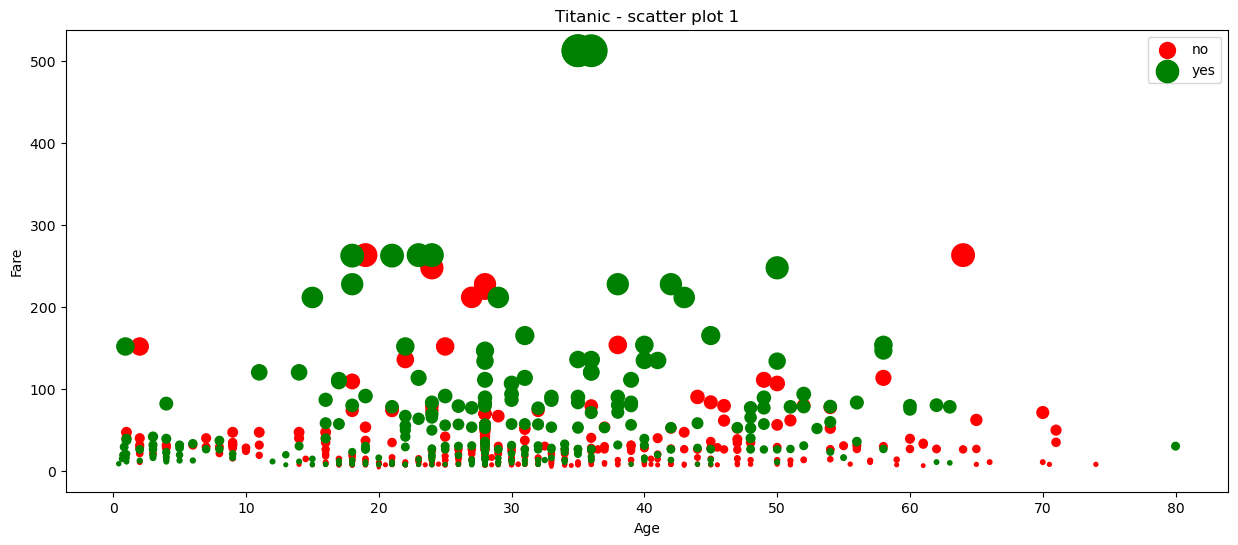

In [4]:
# Tulostetaan datajoukot scatter plot - kuvaajaa käyttäen
plt.figure(2, figsize=(15, 6))

# Ensimmäinen kuvaaja
ax = plt.subplot()
X_out = df[['Survived', 'Age', 'Fare']].copy()
ax.scatter(X_out[X_out['Survived'] == 0]['Age'], X_out[X_out['Survived'] == 0]['Fare'],
           s=X_out[X_out['Survived'] == 0]['Fare'], label='no', c='red')
ax.scatter(X_out[X_out['Survived'] == 1]['Age'], X_out[X_out['Survived'] == 1]['Fare'],
           s=X_out[X_out['Survived'] == 1]['Fare'], label='yes', c='green')
ax.legend()
plt.title("Titanic - scatter plot 1")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

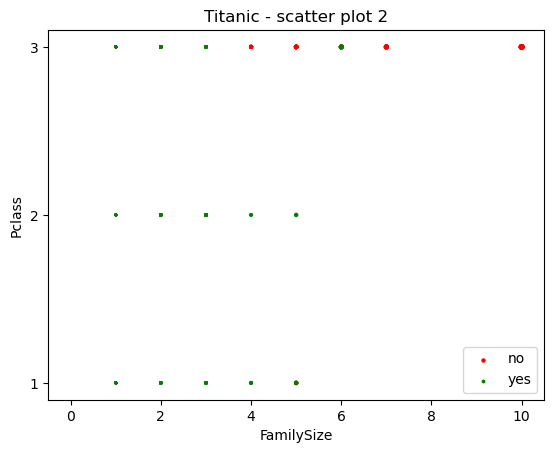

In [5]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
X_out = df[['Survived', 'FamilySize', 'Pclass']].copy()

ax.scatter(X_out[X_out['Survived'] == 0]['FamilySize'], X_out[X_out['Survived'] == 0]['Pclass'],
           s=X_out[X_out['Survived'] == 0]['FamilySize'], label='no', c='red')
ax.scatter(X_out[X_out['Survived'] == 1]['FamilySize'], X_out[X_out['Survived'] == 1]['Pclass'],
           s=X_out[X_out['Survived'] == 1]['FamilySize'], label='yes', c='green')
ax.legend()
plt.title("Titanic - scatter plot 2")
plt.xlabel("FamilySize")
plt.ylabel("Pclass")
plt.show()

In [6]:
from sklearn.cluster import KMeans

actual_result_df = df['Survived']

km_malli = KMeans(n_clusters=4, max_iter=600, random_state=1523, algorithm='auto')
km_malli.fit(df)

pred = km_malli.predict(df)

res_df = pd.DataFrame({'actual': actual_result_df, 'predicted': pred})

print(res_df.head())
correct_predictions = res_df[res_df['actual'] == res_df['predicted']].count()
print(f"Prediction: {round((correct_predictions['actual'] / len(res_df)) * 100, 2)} %")

   actual  predicted
0       0          0
1       1          3
2       1          0
3       1          3
4       0          0
Prediction: 57.58 %
